## Create a faceted plot in ggplot of a public data set use size, shape and color as well as facets

In [2]:
!pip install ggplot
from ggplot import *

    100% |████████████████████████████████| 2.2MB 5.4MB/s 


/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fangqiqiqi/Discussion2/master/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
________________________________________


In [13]:
df['parental education']=df['parental level of education'].map({'some high school':0,'high school':1,'some college':2,
                                                                "associate's degree" :3,"bachelor's degree": 4,"master's degree" : 5})

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental education
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,2


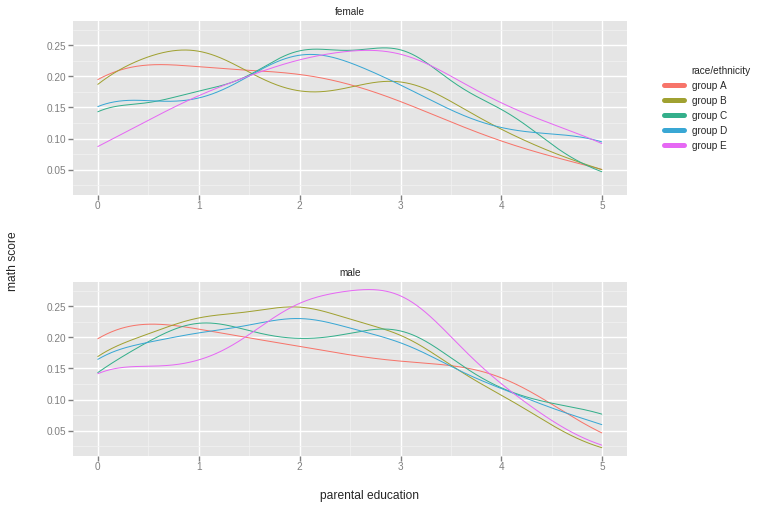

<ggplot: (-9223363305512654213)>

In [38]:
ggplot(aes(x='parental education', y='math score', color = 'race/ethnicity'), data = df ) +\
    geom_density(alpha=1) +\
    facet_wrap("gender")

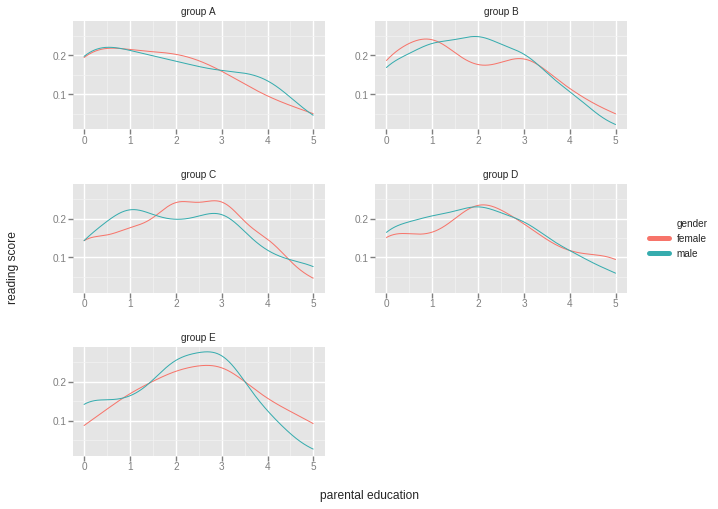

<ggplot: (8731341923336)>

In [39]:
ggplot(aes(x='parental education', y='reading score', color = 'gender'), data = df ) +\
    geom_density(alpha=1) +\
    facet_wrap("race/ethnicity")

## Create a Correlation Heatmap in Seaborn using a public dataset

In [14]:
df['gender_binary']=df['gender'].map({'female':0,'male':1})
df['race']=df['race/ethnicity'].map({'group A':0,'group B':1,'group C':2, 'group D':3, 'group E':4})
df['lunch_bi']=df['lunch'].map({'free/reduced':0,'standard':1})
df['preparation course']=df['test preparation course'].map({'none':0,'completed':1})
df = df.drop(['gender','race/ethnicity','lunch', 'test preparation course','parental level of education'],axis=1)
df.head()

,math score,reading score,writing score,parental education,gender_binary,race,lunch_bi,preparation course
0,72,72,74,4,0,1,1,0
1,69,90,88,2,0,2,1,1
2,90,95,93,5,0,1,1,0
3,47,57,44,3,1,0,0,0
4,76,78,75,2,1,2,1,0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

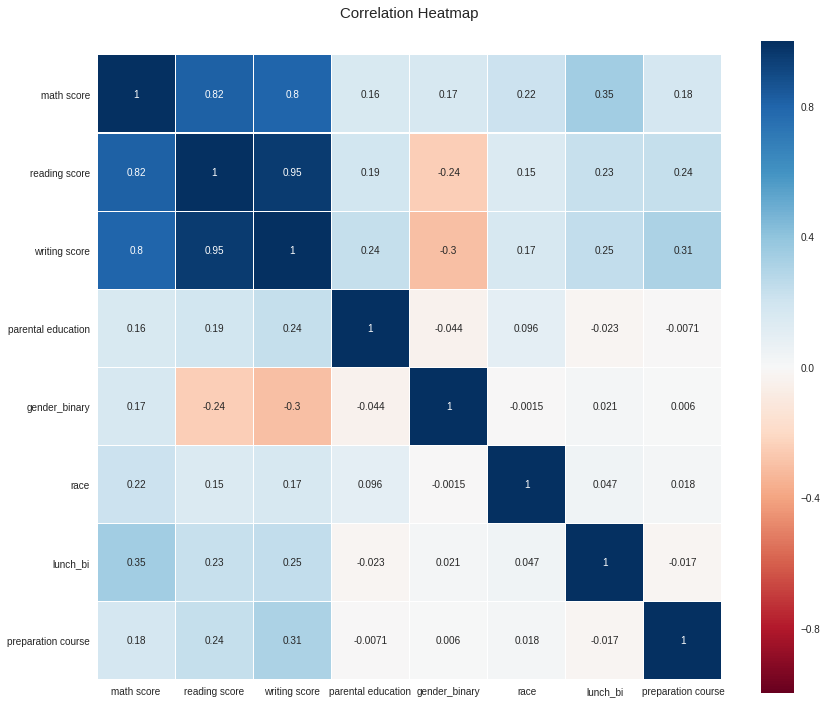

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation Heatmap', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Create your own Test and Training sets using a public dataset

In [0]:
bins = (0, 60, 70, 80, 90,100)
group_names = ['F', 'D','C','B','A']
df['math score'] = pd.cut(df['math score'], bins = bins, labels = group_names)

In [52]:
df.head()

,math score,reading score,writing score,parental education,gender_binary,race,lunch_bi,preparation course
0,C,72,74,4,0,1,1,0
1,D,90,88,2,0,2,1,1
2,B,95,93,5,0,1,1,0
3,F,57,44,3,1,0,0,0
4,C,78,75,2,1,2,1,0


In [0]:
from sklearn.model_selection import train_test_split

data = df
# Specify the features of interest and the classes of the target
features = ["reading score", 	"writing score",	"parental education",	"gender_binary",	"race",	"lunch_bi",	"preparation course"]
classes = ["F", "D","C","B","A"]

# Extract the instances and target
X = data[features]
y = data['math score']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
